In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from mediapipe.tasks import python
import os
from mediapipe.tasks.python import vision
from PIL import Image


In [2]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
)

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
print("Current working directory:", os.getcwd())
image_path = "test_img.jpg"
img = Image.open(image_path).convert("RGB")
image_np = np.array(img)


Current working directory: c:\Users\abdel\Desktop\Graduation Project\App\backend\recommender\notebooks


In [4]:
results = face_mesh.process(image_np)
print(results.multi_face_landmarks)

[landmark {
  x: 0.632277906
  y: 0.699182212
  z: -0.0491438545
}
landmark {
  x: 0.640062511
  y: 0.640562773
  z: -0.0960218385
}
landmark {
  x: 0.636455297
  y: 0.656795561
  z: -0.0495162793
}
landmark {
  x: 0.623584807
  y: 0.573001146
  z: -0.0750276819
}
landmark {
  x: 0.640619278
  y: 0.62045306
  z: -0.102494478
}
landmark {
  x: 0.639836431
  y: 0.593270898
  z: -0.0957578793
}
landmark {
  x: 0.63660568
  y: 0.526690483
  z: -0.0494769849
}
landmark {
  x: 0.504927695
  y: 0.511148155
  z: 0.0103075458
}
landmark {
  x: 0.636151791
  y: 0.477980763
  z: -0.0387670808
}
landmark {
  x: 0.636745095
  y: 0.451495409
  z: -0.0432061
}
landmark {
  x: 0.636678517
  y: 0.351171374
  z: -0.0262671039
}
landmark {
  x: 0.632107198
  y: 0.707501888
  z: -0.04690364
}
landmark {
  x: 0.631598055
  y: 0.716174126
  z: -0.0409455039
}
landmark {
  x: 0.631026447
  y: 0.721903324
  z: -0.0318828225
}
landmark {
  x: 0.630515575
  y: 0.722147
  z: -0.0281973872
}
landmark {
  x: 0.630

c:\Users\abdel\miniconda3\envs\spectacles-ml\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Image saved as annotated_face.jpg


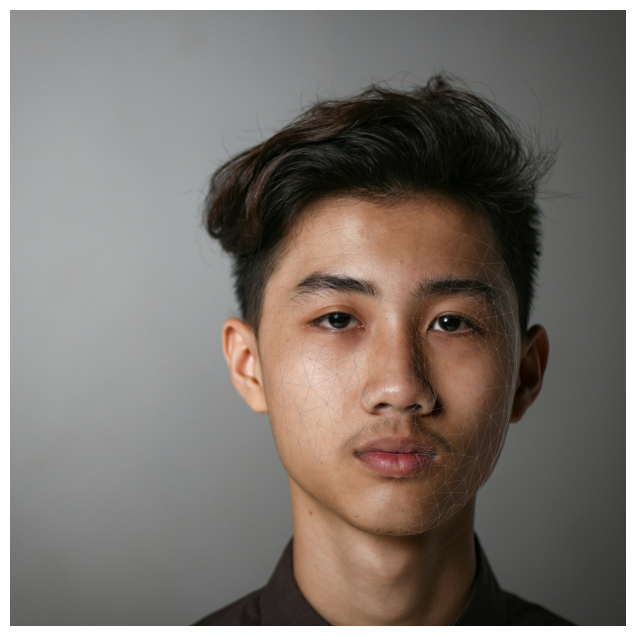

In [5]:
import cv2  # Ensure cv2 is imported

if results.multi_face_landmarks:
    annotated_image = image_np.copy()
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
        )

    # --- METHOD 1: Save using OpenCV (Recommended for raw image) ---
    # OpenCV expects BGR format, but MediaPipe/Matplotlib use RGB.
    # We convert back to BGR before saving to get correct colors.
    output_filename = 'annotated_face.jpg'
    cv2.imwrite(output_filename, cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
    print(f"Image saved as {output_filename}")

    # --- METHOD 2: Save using Matplotlib (Saves the figure/plot) ---
    plt.figure(figsize=(8,8))
    plt.imshow(annotated_image)
    plt.axis('off')
    
    # Save the plot before calling show()
    plt.savefig('annotated_plot.png', bbox_inches='tight', pad_inches=0)
    
    plt.show()
else:
    print("No face detected")